In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

/home/paperspace/projects/jadlg_rnn/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
path = Path('data/metaphors/all/')

In [4]:
df = pd.read_csv(path/'all.csv')
df.head()

,work_id,text,dictionary,context,provenance,comments,updated_at,created_at,theme,id,reviewed_on,metaphor
0,3213.0,"Logitians use to clap a Proposition,<br>\r\n A...",Animals,NaN,"Searching ""rule"" and ""reason"" in HDIS (Poetry)","In this case, not fish-trap as I originally th...",2013-10-04 14:27:45 UTC,2004-06-10 00:00:00 UTC,NaN,8442,2011-06-14,"A Logician is ""one, that has been broke / To R..."
1,3323.0,What raisd their Joy their love coud also rais...,Impression,I've included the entire poem,"Searching ""soul"" and ""impression"" in HDIS (Poe...",NaN,2009-09-14 19:33:39 UTC,2005-05-17 00:00:00 UTC,NaN,8591,NaN,"""Deep in their soules ye fair impression lay, ..."
2,3324.0,"<b>If at the type our dreaming soules awake,<B...",Impression,I've included the entire poem,"Searching ""soul"" and ""impression"" in HDIS (Poe...",<BR>,2009-09-14 19:33:39 UTC,2005-05-17 00:00:00 UTC,NaN,8592,NaN,"""If at the type our dreaming soules awake, / &..."
3,3407.0,"In all mistakes, The Strickt, and Regular,<BR>...",NaN,NaN,"Searching ""mind"" and ""clock"" in HDIS (Poetry)",NaN,2009-09-14 19:33:43 UTC,2006-11-16 00:00:00 UTC,NaN,8698,NaN,"""As no Man mind's those Clocks that use to go ..."
4,5026.0,"""Edward, lo! to sudden fate <BR>""(Weave we the...",Inhabitants,NaN,HDIS,NaN,2009-09-14 19:38:37 UTC,2003-11-11 00:00:00 UTC,NaN,13518,NaN,Unborn ages may crowd on the soul


In [5]:
text = df['text'].astype(str)
metaphor = df['metaphor'].astype(str)
text = [t.lower().replace('\r','').replace('/','').replace('"','').replace("'","").replace("\n","").replace('<br>','').replace('<i>','').replace('--','') for t in text]
metaphor = [t.lower().replace('\r','').replace('/','').replace('"','').replace("'","").replace("\n","").replace('<br>','').replace('<i>','').replace('--','') for t in metaphor]

In [6]:
text[:-3]

['logitians use to clap a proposition, as justices do criminals, in prison; and in as learnd authentique nonsense writ, the names of all their moodes and figures fit; <b>for a logicians one, that has been broke to ride and pace his reason by the booke, and by their rules, and precepts, and examples, to put his wits into a kind of trammells<b>.',
 'what raisd their joy their love coud also raise,& each contended in the words of praise,& evry word proclaimd the wonders past,& god was still ye first & still ye last,<b>deep in their soules ye fair impression lay,deep-tracd & never to be worn away.<b>',
 '<b>if at the type our dreaming soules awake,& hannahs strains their just impression make<b>,the boundless powr of providence we know,& fix our trust on nothing here below.then he grown pleasd that men his greatness own,lookes down serenely from his starry throne,& bids ye blessed days our prayrs have wonput on their glorys & prepare to run.for which our thanks be justly sent above,enlargd 

In [7]:
c0, c1 = [],[]

for i in range(len(text)):
    text[i] = re.sub('\x0b','',text[i])
    t = re.sub('<b>.*<b>',' xxmsk ',text[i]).split(' xxmsk ')
    c0.append(t[0])
    if len(t) > 1:  c1.append(t[1])
    else: c1.append('')
    #text[i] = re.sub('<.*>','',text[i])
    #metaphor[i] = re.sub('<.*>','',metaphor[i])
    #text[i] = re.sub('\x0b','',text[i])
    metaphor[i] = re.sub('\x0b','',metaphor[i])
    #text[i].replace('.(p','')
    #text[i].replace(' ','')
    #text[i].replace('.(pp','')
    
    #metaphor[i] = re.sub('(.*)','',metaphor[i])

In [8]:
c0[5],c1[5],metaphor[5]

('the verse adorn again fierce war and faithful love, and truth severe, by fairy fiction dressed. in buskined measures move pale grief and pleasing pain, with ',
 '.a voice as of the cherub-choir gales from blooming eden bear; and distant warblings lessen on my ear, that lost in long futurity expire. fond impious man, thinkst thou yon sanguine cloud, raised by thy breath, has quenched the orb of day? tomorrow he repairs the golden flood, and warms the nations with redoubled ray. enough for me: with joy i see the different doom our fates assign. be thine despair and sceptered care; to triumph, and to die, are mine. he spoke, and headlong from the mountains height deep in the roaring tide he plunged to endless night. (ll. 125-44, pp. 198-200)',
 'horror may be a tyrant of the throbbing breast')

In [9]:
tok_c0 = Tokenizer.proc_all(c0,lang='en')
tok_c1 = Tokenizer.proc_all(c1,lang='en')
tok_tgt = Tokenizer.proc_all(metaphor,lang='en')
len(tok_tgt)

14957

In [15]:
#tok_src[0], tok_tgt[0]

In [9]:
#tokenizer = Tokenizer()

In [10]:
#def mask_sequences(texts):
#    masked_text = []
#    for text in texts:
#        for token in tokenizer.tok(text):
#            if token.pos_ == 'VERB' and not token.is_stop:
#                text = text.replace(str(token),' xxmsk ')
#        masked_text.append(text)
#    return masked_text

In [11]:
#masked_metaphor = mask_sequences(metaphor)
#masked_metaphor[:10]

In [12]:
#masked_metaphor = [text.replace(' xxmsk ','xxmsk') for text in masked_metaphor]
#masked_metaphor[:10]

In [13]:
#pickle.dump(masked_metaphor, open(path/'metaphors_masked.pkl','wb'))

In [14]:
#masked_metaphor = pickle.load(open(path/'metaphors_masked.pkl','rb'))
#len(masked_metaphor)

In [10]:
import collections

def toks2ids(tok, pre,is_src=True,ovrt=False):
    if ovrt:
        freq = collections.Counter(p for o in tok for p in o)
        itos = [o for o,c in freq.most_common(20000)]
        itos.insert(0, 'xxunk')
        itos.insert(1, 'xxpad')
        itos.insert(2, 'xxbos')
        #itos.insert(3, 'xxmsk')
        stoi = collections.defaultdict(lambda: 0, {v:k for k,v in enumerate(itos)})
        pickle.dump(itos, open(path/f'{pre}_itos.pkl', 'wb'))
    else: 
        itos = pickle.load(open(path/f'{pre}_itos.pkl', 'rb'))
        stoi = collections.defaultdict(lambda: 0, {v:k for k,v in enumerate(itos)})
    return itos,stoi

In [17]:
#tok_src = Tokenizer.proc_all(masked_metaphor,lang='en')
#tok_tgt = Tokenizer.proc_all(metaphor,lang='en')
#len(tok_src), len(tok_tgt)

In [30]:
itos,stoi = toks2ids(tok_c0+tok_c1+tok_tgt,'metaphors',ovrt=True)
#itos,stoi = toks2ids(tok_tgt,'metaphors',ovrt=False)
c0_ids = np.array([[2]+[stoi[o] for o in p] for p in tok_c0])
c1_ids = np.array([[2]+[stoi[o] for o in p] for p in tok_c1])
tgt_ids = np.array([[2]+[stoi[o] for o in p] for p in tok_tgt])
len(itos),len(c0_ids),len(tgt_ids)

(20003, 14957, 14957)

In [31]:
c0_ids[0], tgt_ids[0]

([2,
  0,
  265,
  8,
  8926,
  10,
  2910,
  3,
  18,
  19527,
  100,
  8670,
  3,
  9,
  1870,
  11,
  5,
  9,
  18,
  3885,
  0,
  4629,
  2712,
  3,
  4,
  1413,
  6,
  34,
  41,
  0,
  5,
  1315,
  747,
  11],
 [2,
  10,
  16489,
  13,
  65,
  3,
  12,
  84,
  113,
  1599,
  8,
  3107,
  5,
  3503,
  17,
  102,
  28,
  4,
  6344,
  3,
  5,
  28,
  41,
  645,
  3,
  5,
  1969,
  3,
  5,
  2832,
  3,
  8,
  356,
  17,
  2643,
  87,
  10,
  191,
  6,
  0,
  7])

In [32]:
trn_c0,val_c0,trn_c1,val_c1,trn_tgt,val_tgt = sklearn.model_selection.train_test_split(c0_ids,c1_ids,tgt_ids,test_size=0.1,shuffle=False)

In [33]:
len(trn_c0), len(trn_tgt), len(val_c0), len(val_tgt)

(13461, 13461, 1496, 1496)

In [34]:
trn_c0[:2], trn_c1[:2],trn_tgt[:2]

(array([list([2, 0, 265, 8, 8926, 10, 2910, 3, 18, 19527, 100, 8670, 3, 9, 1870, 11, 5, 9, 18, 3885, 0, 4629, 2712, 3, 4, 1413, 6, 34, 41, 0, 5, 1315, 747, 11]),
        list([2, 53, 1871, 41, 278, 41, 91, 666, 277, 657, 3, 86, 144, 10640, 9, 4, 229, 6, 558, 3, 86, 415, 352, 11074, 4, 2225, 434, 3, 86, 135, 39, 125, 330, 115, 86, 125, 330, 202, 3])],
       dtype=object),
 array([list([2, 7]), list([2])], dtype=object),
 array([list([2, 10, 16489, 13, 65, 3, 12, 84, 113, 1599, 8, 3107, 5, 3503, 17, 102, 28, 4, 6344, 3, 5, 28, 41, 645, 3, 5, 1969, 3, 5, 2832, 3, 8, 356, 17, 2643, 87, 10, 191, 6, 0, 7]),
        list([2, 339, 9, 41, 8318, 330, 232, 338, 508, 3, 339, 29, 9594, 86, 127, 8, 21, 2177, 242, 7])],
       dtype=object))

In [35]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    header = fin.readline().split()
    n, d = header[0], header[1]
    data = {}
    #partitions = [fin[:]]
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array(tokens[1:], dtype=float)
    return data, n, d

In [17]:
en_vecs, vs, dim_en_vec = load_vectors('/home/paperspace/projects/seq2seq_bot/data/wiki-news-300d-1M.vec')

In [41]:
class MaskDataset(Dataset):
    def __init__(self, c0, c1,tgt):
        self.c0 = c0
        self.c1 = c1
        self.tgt = tgt
        self.ml = 100
    def __getitem__(self, idx):
        return A(self.c0[idx][-100:]), A(self.c1[idx][-self.ml:]), A(self.tgt[idx][-self.ml:]),A(self.tgt[idx][-self.ml:])
    def __len__(self): return len(self.src)

In [42]:
trn_seq2seq_ds = MaskDataset(trn_c0,trn_c1,trn_tgt)
val_seq2seq_ds = MaskDataset(val_c0,val_c1,val_tgt)

In [43]:
bs=32

trn_samp = SortishSampler(trn_c0, lambda x: len(trn_c0[x]), bs)
val_samp = SortSampler(val_c0, lambda x: len(val_c0[x]))

trn_seq2seq_dl = DataLoader(trn_seq2seq_ds,batch_size=bs,pad_idx=1,num_workers=1,pre_pad=False, transpose_y=True, transpose=True, sampler=trn_samp)
val_seq2seq_dl = DataLoader(val_seq2seq_ds,batch_size=bs,pad_idx=1,num_workers=1,pre_pad=False, transpose_y=True, transpose=True, sampler=val_samp)

In [44]:
c0, c1, x, y = next(iter(trn_seq2seq_dl))
c0.size(), c1.size(), x.size(), y.size()

(torch.Size([100, 32]),
 torch.Size([100, 32]),
 torch.Size([32, 100]),
 torch.Size([32, 100]))

In [45]:
md = ModelData(path, trn_seq2seq_dl, val_seq2seq_dl)

In [46]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[0])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [47]:
def seq2seq_loss(input, target, kld_weight=0):
    decoded = input
    sl, bs = target.size()
    sl_in,bs_in,nc = decoded.size()
    if sl>sl_in: decoded = F.pad(decoded, (0,0,0,0,0,sl-sl_in))
    decoded = decoded[:sl]
    return F.cross_entropy(decoded.view(-1,nc), target.view(-1))

In [48]:
def create_emb(vecs, itos, em_sz):
    emb = nn.Embedding(len(itos), em_sz, padding_idx=1)
    wgts = emb.weight.data
    miss = []
    for i,w in enumerate(itos):
        try: wgts[i] = torch.from_numpy(vecs[w])
        except: miss.append(w)
    print(len(miss),miss[5:10])
    return emb

In [58]:
class VAE(nn.Module):
    def __init__(self,vs,vecs,itos,em_sz,latent_sz,nh,nl=2, dropf=1,wdrop=0,kld_weight=1e-3):
        super().__init__()
        self.initrange=0.1
        self.wdrop,self.kld_weight = wdrop,kld_weight
        self.nl,self.nh, self.vs,self.em_sz,self.latent_sz = nl,nh,vs,em_sz,latent_sz
        #encoder
        self.emb_enc = create_emb(vecs,itos,em_sz)
        self.emb_enc_drop = nn.Dropout(0.15*dropf)
        self.gru_enc = nn.GRU(em_sz, nh, num_layers=nl, dropout=0.25*dropf, bidirectional=True)
        self.out_drop = nn.Dropout(0.35*dropf)
        #latent space layers
        self.h2m = nn.Linear(nh*nl*2*3, latent_sz)
        self.h2m.weight.data.uniform_(-self.initrange, self.initrange)
        self.h2log = nn.Linear(nh*nl*2*3, latent_sz)
        self.h2log.weight.data.uniform_(-self.initrange, self.initrange)
        #self.z2h = nn.Linear(latent_sz, nh*nl)
        #self.z2h.weight.data.uniform_(-self.initrange, self.initrange)
        #decoder
        self.gru_dec = nn.GRU(em_sz+latent_sz, nh*2, num_layers=nl, dropout=0.25*dropf)
        self.out = nn.Linear(nh*2, vs)
        self.out.weight.data.uniform_(-self.initrange, self.initrange)
        self.pr_force = 1.
        
    def forward(self, inp, y=None):
        #encode
        c0,c1,x = inp
        x = x.transpose(1,0)
        sl,bs = x.size()
        hidden = self.initHidden(bs) # nl*bs*nh
        
        emb1 = self.emb_enc_drop(self.emb_enc(c0)) #sl*bs*em_sz
        _, hidden = self.gru_enc(emb1,hidden) #enc_out: sl*bs*nh, hidden: (2*nl)*bs*nh
        h1 = hidden.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(self.nl,bs,-1)
        
        emb2 = self.emb_enc_drop(self.emb_enc(c1)) #sl*bs*em_sz
        _, hidden = self.gru_enc(emb2,hidden) #enc_out: sl*bs*nh, hidden: (2*nl)*bs*nh
        h2 = hidden.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(self.nl,bs,-1)
        
        emb3 = self.emb_enc_drop(self.emb_enc(x)) #sl*bs*em_sz
        _, hidden = self.gru_enc(emb3,hidden) #enc_out: sl*bs*nh, hidden: (2*nl)*bs*nh
        h3 = hidden.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(self.nl,bs,-1)
        
        hidden = torch.cat([h1,h2,h3],1)
        
        mu,logvar = self.h2m(hidden.view(bs,-1)),self.h2log(hidden.view(bs,-1))
        std = torch.exp(0.5 * logvar)
        eps = V(torch.randn(mu.size())) #bs*latent_sz
        z = eps * std + mu #bs*latent_sz

        #decode
        #hidden = self.z2h(z).view(self.nl, bs, self.nh)
        hidden = self.initHidden(bs).view(self.nl,bs,self.nh*2)
        dec_seq = x.clone()
        #word dropout
        if self.wdrop > 0: 
            prob = V(torch.rand(dec_seq.size())) 
            prob[(dec_seq.data - stoi['xxbos']) * (dec_seq.data - stoi['xxpad']) == 0] = 1
            dec_seq[prob < self.wdrop] = stoi['xxunk']
        
        res = []
        dec_inp = dec_seq[0]
        
        for i in range(sl):
            dec_emb = self.emb_enc(dec_inp)
            gru_inp = torch.cat([dec_emb,z], 1).unsqueeze(0)
            outp, hidden = self.gru_dec(gru_inp, hidden) #output: sl*bs*(nh*nl*2), hidden: (nl*2)*bs*nh
            hidden = hidden.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(self.nl,bs,-1)
            outp = self.out(self.out_drop(outp)) #bs*vs
            res.append(outp)
            if (random.random()<self.pr_force):
                dec_inp = dec_seq[i]
            else:
                dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
        return outp, mu, logvar, z
    
    def inference(self,z):
        res =[]
        bs,_ = z.size()
        samples = V(torch.zeros(sl, bs).long())
        #z = V(torch.randn([bs, self.latent_sz]))
        #hidden = self.z2h(z).view(self.nl, bs, self.nh)
        hidden = self.initHidden(bs).view(self.nl,bs,self.nh*2)
        dec_inp = V(torch.zeros(bs)+stoi['xxbos']).long()
        for i in range(MAX_LENGTH):
            emb = self.emb_enc(dec_inp)
            gru_inp = torch.cat([emb,z],1).unsqueeze(0)
            outp, hidden = self.gru_dec(gru_inp, hidden)
            
            outp = self.out(outp[0])
            res.append(outp)
            #dec_inp = V(torch.topk(outp,1,-1)[1]).squeeze(1)
            dec_inp = V(outp.data.max(1)[1])
            outp = F.log_softmax(outp, dim=1)
            outp = torch.multinomial(torch.exp(outp), 1)
            samples[i, :] = outp.view(-1).data
            dec_inp = V(outp.view(-1))
            if (dec_inp==1).all(): break
        return torch.stack(res)
    
    def initHidden(self, bs):
        h = V(torch.zeros(self.nl*2, bs, self.nh))
        #if torch.cuda.is_available(): h = h
        return h

In [59]:
def kl_anneal_function(anneal_function, step, k, x0):
    if anneal_function == 'logistic':
        return float(1/(1+np.exp(-k*(step-x0))))
    elif anneal_function == 'linear':
        return min(1, step/x0)

In [80]:
def vae_loss(input, target, kld_weight):
    decoded, mu, logvar, z = input
    sl, bs = target.size()
    sl_in,bs_in,nc = decoded.size()
    if sl>sl_in: decoded = F.pad(decoded, (0,0,0,0,0,sl-sl_in))
    decoded = decoded[:sl]
    #loss = seq2seq_loss(decoded, target)
    loss = F.cross_entropy(decoded.view(-1,nc), target.contiguous().view(-1))
    KL_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss += KL_loss * kld_weight
    return loss

In [78]:
class VAEStepper(Stepper):
    
    def step(self, x, y, epoch, an_f='logistic',kld_start_inc=5):
        xtra = []
        #self.m.wdrop = 0.1 if epoch>4 else 0
        self.m.pr_force = (10-epoch)*0.1 if epoch<10 else 0
        y = y.transpose(1,0)
        output = self.m(x, y)
        if isinstance(output,tuple): output,*xtra = output
        self.opt.zero_grad()
        loss = raw_loss = self.crit([output]+xtra, y, self.m.kld_weight)
        loss.backward()
        if epoch > kld_start_inc:
            self.m.kld_weight = kl_anneal_function(an_f,epoch,self.m.kld_weight,kld_start_inc)
        if self.clip:   # Gradient clipping
            nn.utils.clip_grad_norm_(trainable_params_(self.m), self.clip)
        self.opt.step()
        return raw_loss.data.item()
    
    def evaluate(self, x, y):
        self.m.eval()
        xtra = []
        #x = x[0]
        output = self.m(x, y)
        #decoded, m, l, z = output
        if isinstance(output,tuple): output,*xtra = output
#        loss = raw_loss = self.crit([output]+xtra,y, kld_weight)
    
        return output, self.crit([output]+xtra,y, self.m.kld_weight)

In [62]:
nh = 64
nl = 2
vs = len(itos)
em_sz = int(dim_en_vec)
#latent_sz = em_sz
latent_sz = 16
vae = VAE(vs,en_vecs,itos,em_sz,latent_sz,nh,nl=nl)
vae.cuda()

2488 ['em>.', 'fancys', '.(p', 'formd', 'lovd']


VAE(
  (emb_enc): Embedding(20003, 300, padding_idx=1)
  (emb_enc_drop): Dropout(p=0.15)
  (gru_enc): GRU(300, 64, num_layers=2, dropout=0.25, bidirectional=True)
  (out_drop): Dropout(p=0.35)
  (h2m): Linear(in_features=768, out_features=16, bias=True)
  (h2log): Linear(in_features=768, out_features=16, bias=True)
  (gru_dec): GRU(316, 128, num_layers=2, dropout=0.25)
  (out): Linear(in_features=128, out_features=20003, bias=True)
)

In [63]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.8))

In [81]:
learn = RNN_Learner(md, SingleModel(to_gpu(vae)), opt_fn=opt_fn)
learn.crit = vae_loss

 70%|███████   | 295/421 [02:09<00:55,  2.28it/s, loss=17.8]

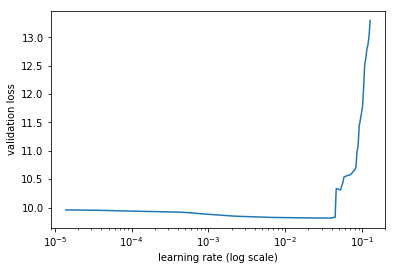

In [82]:
learn.lr_find(stepper=VAEStepper)
learn.sched.plot()

In [126]:
lr=3e-3

In [127]:
learn.fit(lr, 1, cycle_len=25, stepper=VAEStepper, use_clr=(32,10))

epoch      trn_loss   val_loss                              
    0      2.149078   2.089448  
    1      1.186349   1.338426                              
    2      1.067495   1.130175                              
    3      1.009661   1.100563                               
    4      1.060269   1.061418                              
    5      0.967309   1.1028                                 
    6      1.045284   1.13537                               
    7      0.979586   1.161513                               
    8      1.032645   1.147812                               
    9      0.998764   1.148085                               
    10     1.261229   1.162834                              
    11     1.185575   1.200248                              
    12     1.088203   1.195055                              
    13     1.039447   1.222535                              
    14     1.020346   1.208213                              
    15     1.18359    1.210807                 

[1.267304623190732]

In [73]:
learn.save('vae_metaphors')

In [99]:
learn.load('vae_metaphors')

In [53]:
learn.fit(lr/10, 1, cycle_len=8, stepper=VAEStepper, use_clr=(20,8))

epoch      trn_loss   val_loss                              
    0      4.960727   5.174614  
    1      4.278578   5.172833                              
    2      4.844539   5.17032                               
    3      4.416083   5.168694                              
    4      4.287536   5.169852                              
    5      4.149753   5.174025                              
    6      4.161283   5.172613                              
    7      4.239572   5.173017                              


[5.173016836298978]

In [110]:
def produce_out(val_dl, model, interval=(0,10)):
    
    model.eval()
    out = []
    ds = next(iter(val_dl))
    x, y = ds
    bs, sl = x.size()
    model.wdrop=0.1
    #x = x.long()
    #if use_cuda:
    #    x = x.cuda()
    decoded, mu, logvar, z = model(x)
    #z = V(torch.randn((bs,model.latent_sz)))
    #probs = model.inference(z)
    preds = np.array(decoded.max(2)[1])
    #preds = np.array(probs.max(2)[1])
    for i in range(interval[0], interval[-1]):
        out.append([' '.join(itos[o] for o in x[:,i] if o not in [1,2]), \
                   ' '.join(itos[o] for o in preds[:,i] if o not in [1,2]), \
                   ' '.join(itos[o] for o in y[:,i] if o not in [1,2])])
    return out,z

In [111]:
MAX_LENGTH=50
out,z = produce_out(trn_seq2seq_dl, learn.model)

In [112]:
out[2][2]

'the primaries and the early events in an election would correspond roughly to the preliminary unconscious processing . the winning coalition associated with an object or event would correspond to the winning party , which would remain in power for some time and would attempt to influence and control future events . attention would correspond to the efforts of journalists , pollsters and others to focus on certain issues rather than others , and thus attempt to bias the electorate in their favor . perhaps those large pyramidal cells in cortical layer 5 that project to the superior colliculus and the thalamus ( both involved in attention ) would correspond to electoral polls . these progress from early , tentative polls to later , rather more accurate ones as the election approaches . it is unlikely that all this happens in the brain in a fixed time sequence . the brain may resemble more the british system , in which the time between one election and the next can be irregular .'

In [113]:
out[2][0]

'the primaries and the early events in an election would correspond roughly to the preliminary unconscious processing . the winning coalition associated with an object or event would correspond to the winning party , which would remain in power for some time and would attempt to influence and control future events . attention would correspond to the efforts of journalists , pollsters and others to focus on certain issues rather than others , and thus attempt to bias the electorate in their favor . perhaps those large pyramidal cells in cortical layer 5 that project to the superior colliculus and the thalamus ( both involved in attention ) would correspond to electoral polls . these progress from early , tentative polls to later , rather more accurate ones as the election approaches . it is unlikely that all this happens in the brain in a fixed time sequence . the brain may resemble more the british system , in which the time between one election and the next can be irregular .'

In [114]:
out[2][1]

'the fancies and the early events in an fertilizer would enter near to the beginning unconscious scenes . xxunk ten sheet shines with an object or event would enter to the ten party , xxunk would remain in xxunk xxunk some xxunk and would attempt xxunk influence and control future events . attention would enter to the efforts of xxunk , proud and others xxunk mirrour on certain clay rather than others , and thus attempt to pour the evry xxunk their roll . perhaps those large rising xxunk xxunk perpetual content three that opinion xxunk the superior heavenly and the cells xxunk both guide in attention ) would enter to family xxunk . these progress from early , bid endless to held , rather more factors ones as the wing sits . it is hot that all this happens in xxunk brain in a fixed time stamps . the brain may xxunk more the evry system , in which the time between one wing and the xxunk can be monarch .'

In [115]:
def interpolate(start, end, steps):

    interpolation = np.zeros((start.shape[0], steps + 2))

    for dim, (s,e) in enumerate(zip(start,end)):
        interpolation[dim] = np.linspace(s,e,steps+2)

    return interpolation.T

In [116]:
z1 = torch.randn([latent_sz]).numpy()
z2 = torch.randn([latent_sz]).numpy()
z = V(torch.from_numpy(interpolate(start=z1, end=z2, steps=8)).float())
samples = learn.model.inference(z)

In [117]:
samples.size()

torch.Size([50, 10, 20003])

In [118]:
samples = np.array(samples.max(2)[1])
samples = samples.T
[' '.join(itos[o] for o in sample if o not in [0,1,2]) for sample in samples]

['', '', '', '', '', '', '', '', '', '']